In [4]:
import pandas as pd

In [3]:
df=pd.read_csv('new_crop_meerut.csv')
df.head(12)

,N,P,K,temperature,humidity,rainfall,ph,label
0,185,35.6,224.3,20,71,900,6.5,rice
1,149,60.3,24.6,21,72,950,6.4,rice
2,220,51.8,239.3,22,73,1000,7.3,rice
3,180,52.0,192.2,23,74,1050,7.2,rice
4,215,42.5,140.3,24,75,1100,6.9,rice
5,179,32.7,284.7,15,51,500,8.2,wheat
6,230,38.1,280.2,26,61,1000,7.8,sugarcane
7,218,44.2,284.1,16,52,600,7.3,wheat
8,288,42.3,284.1,17,53,700,8.2,wheat
9,268,49.2,270.1,18,54,800,8.1,wheat


In [137]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
rainfall       0
ph             0
label          0
dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            15 non-null     int64  
 1   P            15 non-null     float64
 2   K            15 non-null     float64
 3   temperature  15 non-null     int64  
 4   humidity     15 non-null     int64  
 5   rainfall     15 non-null     int64  
 6   ph           15 non-null     float64
 7   label        15 non-null     object 
dtypes: float64(3), int64(4), object(1)
memory usage: 1.1+ KB


In [139]:
df['label'].value_counts()

label
sugarcane    6
rice         5
wheat        4
Name: count, dtype: int64

In [140]:
x=df.drop('label', axis=1)
y=df['label']

In [141]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            15 non-null     int64  
 1   P            15 non-null     float64
 2   K            15 non-null     float64
 3   temperature  15 non-null     int64  
 4   humidity     15 non-null     int64  
 5   rainfall     15 non-null     int64  
 6   ph           15 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 972.0 bytes


In [142]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15 entries, 0 to 14
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
15 non-null     object
dtypes: object(1)
memory usage: 252.0+ bytes


In [143]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1,test_size=0.2)

In [144]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2 to 5
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            12 non-null     int64  
 1   P            12 non-null     float64
 2   K            12 non-null     float64
 3   temperature  12 non-null     int64  
 4   humidity     12 non-null     int64  
 5   rainfall     12 non-null     int64  
 6   ph           12 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 768.0 bytes


In [145]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 12 entries, 2 to 5
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
12 non-null     object
dtypes: object(1)
memory usage: 192.0+ bytes


In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
model=LogisticRegression()
model.fit(x_train, y_train)

C:\Users\ROYAL INFOTECH\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
y_pred1=model.predict(x_test)

In [149]:
from sklearn.metrics import accuracy_score
logistic_reg_acc=accuracy_score(y_test,y_pred1)
print("logistic accuracy is "+ str(logistic_reg_acc))

logistic accuracy is 0.6666666666666666


In [150]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred3=model2.predict(x_test)

In [151]:
decision_acc=accuracy_score(y_test, y_pred3)
print("Decision tree accuracy is "+ str(decision_acc))

Decision tree accuracy is 1.0


In [152]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(x_train, y_train)
y_pred4=model3.predict(x_test)

In [153]:
random_acc=accuracy_score(y_test, y_pred4)
print("Random forest accuracy is "+ str(random_acc))

Random forest accuracy is 1.0


In [154]:
import joblib

In [155]:
filename='crop_app'

In [156]:
joblib.dump(model2, 'crop_app')

['crop_app']

In [157]:
app=joblib.load('crop_app')

In [158]:
arr=[[270,50,270,18,54,800,8]]
y_pred5=app.predict(arr)

C:\Users\ROYAL INFOTECH\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [159]:
y_pred5

array(['wheat'], dtype=object)

label
sugarcane    6
rice         5
wheat        4
Name: count, dtype: int64


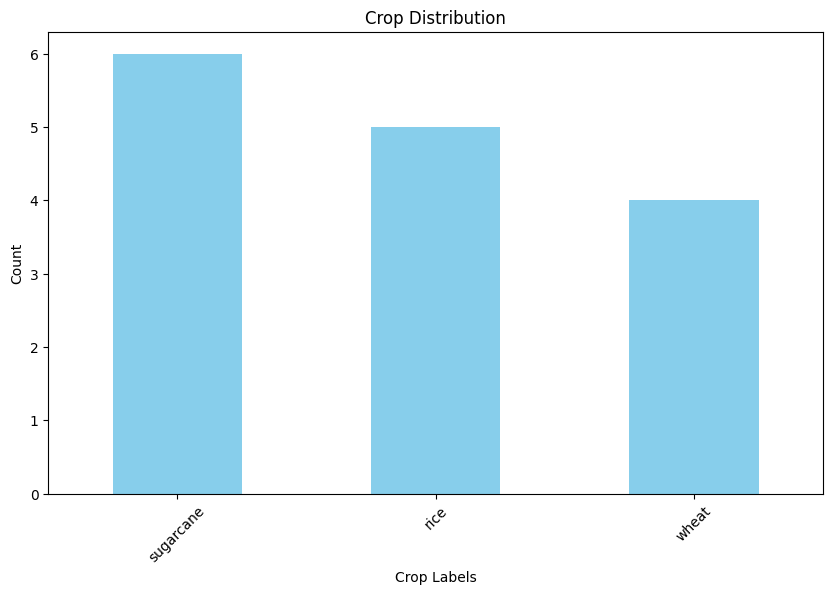

In [160]:
# Check the count of each crop label in the dataset
print(df['label'].value_counts())

# Visualize the imbalance (optional, but helpful)
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Crop Distribution")
plt.xlabel("Crop Labels")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [161]:
y_train_pred = model.predict(x_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))


Training Accuracy: 1.0


In [162]:
from imblearn.over_sampling import SMOTE

# Adjust the k_neighbors parameter
smote = SMOTE(random_state=1, k_neighbors=3)
x_resampled, y_resampled = smote.fit_resample(x, y)

print("New Label Distribution:")
print(pd.Series(y_resampled).value_counts())


New Label Distribution:
label
rice         6
wheat        6
sugarcane    6
Name: count, dtype: int64


In [163]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy:", scores.mean())


C:\Users\ROYAL INFOTECH\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation Accuracy: 0.8666666666666666


In [164]:
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(x_train, y_train)

# Save the Random Forest model
import joblib
joblib.dump(model_rf, 'crop_app')


['crop_app']

In [165]:
test_inputs = [
    [270, 50, 270, 18, 54, 800, 8],  # Example 1
    [180, 60, 190, 25, 70, 6.5, 500],  # Example 2
    [150, 40, 160, 22, 65, 7.0, 600]   # Example 3
]

for arr in test_inputs:
    print("Input:", arr, "Prediction:", model_rf.predict([arr]))


Input: [270, 50, 270, 18, 54, 800, 8] Prediction: ['wheat']
Input: [180, 60, 190, 25, 70, 6.5, 500] Prediction: ['rice']
Input: [150, 40, 160, 22, 65, 7.0, 600] Prediction: ['sugarcane']


C:\Users\ROYAL INFOTECH\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ROYAL INFOTECH\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ROYAL INFOTECH\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


C:\Users\ROYAL INFOTECH\AppData\Local\Temp\ipykernel_9572\1008856491.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette="viridis")


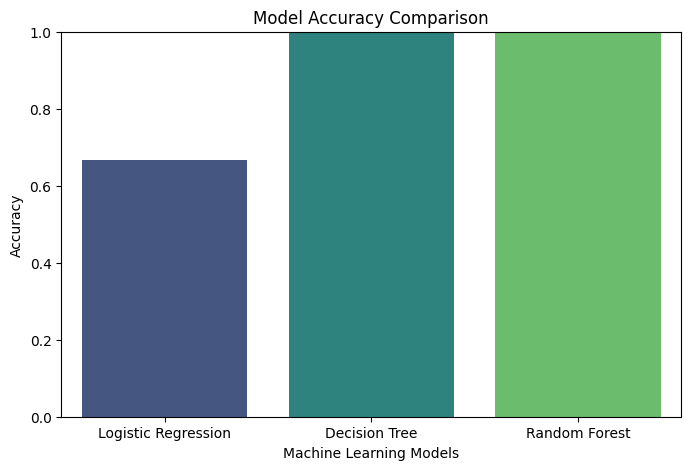

In [166]:
import seaborn as sns

models = ["Logistic Regression", "Decision Tree", "Random Forest"]
accuracy = [logistic_reg_acc, decision_acc, random_acc]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy, palette="viridis")
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy is between 0-1
plt.show()


C:\Users\ROYAL INFOTECH\AppData\Local\Temp\ipykernel_9572\1744695788.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette="coolwarm")


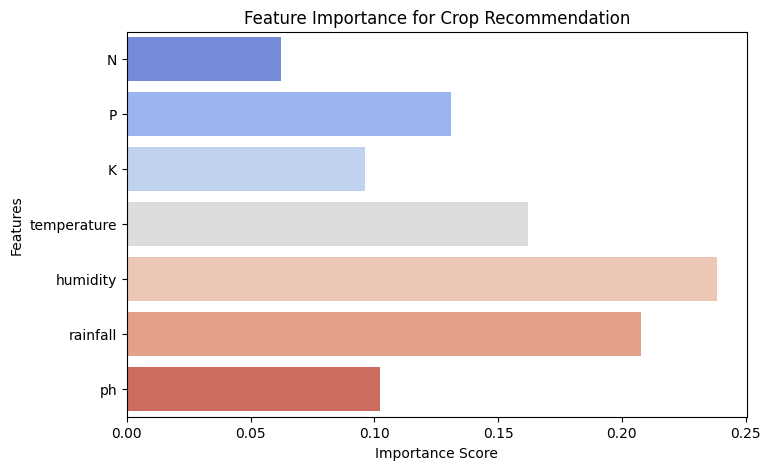

In [167]:
import numpy as np

feature_importance = model_rf.feature_importances_
features = x_train.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=features, palette="coolwarm")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Crop Recommendation")
plt.show()


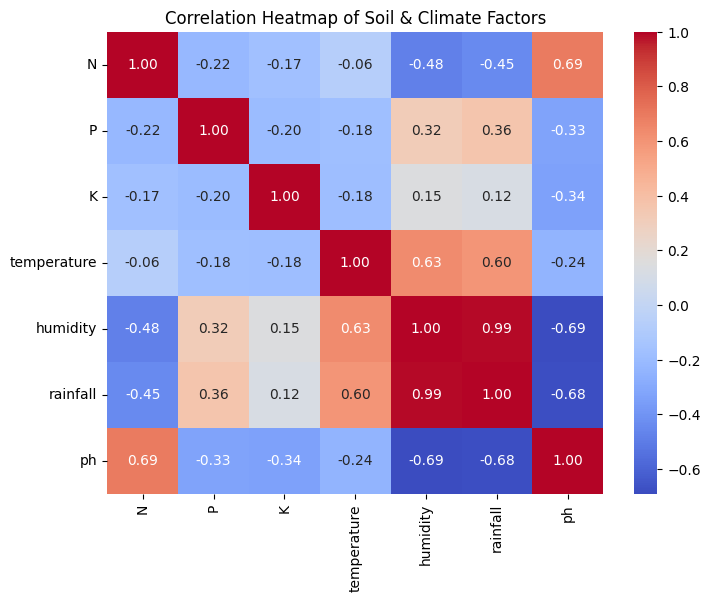

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Soil & Climate Factors")
plt.show()


In [5]:
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
rainfall       0
ph             0
label          0
dtype: int64


In [8]:
test_inputs = [
    [270, 50, 270, 18, 54, 800, 8],  
    [180, 60, 190, 25, 70, 500, 6.5],  
    [150, 40, 160, 22, 65, 600, 7.0]   
]

In [9]:
df.info() and df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            30 non-null     int64  
 1   P            30 non-null     float64
 2   K            30 non-null     float64
 3   temperature  30 non-null     int64  
 4   humidity     30 non-null     int64  
 5   rainfall     30 non-null     int64  
 6   ph           30 non-null     float64
 7   label        30 non-null     object 
dtypes: float64(3), int64(4), object(1)
memory usage: 2.0+ KB


In [10]:
arr = [[270, 50, 270, 18, 54, 800, 8]]
y_pred5 = app.predict(arr)
print(y_pred5)

NameError: name 'app' is not defined

In [12]:
import joblib

# Load the model again
app = joblib.load('crop_app')

# Now, make predictions
arr = [[140,28.4,200.4,14,55,400,7]]
y_pred5 = app.predict(arr)
print("Predicted Crop:", y_pred5)


Predicted Crop: ['wheat']


C:\Users\ROYAL INFOTECH\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model again
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(x_train, y_train)

# Now get feature importance
feature_importance = model_rf.feature_importances_
features = x_train.columns

# Plot feature importance
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=features, palette="coolwarm")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Crop Recommendation")
plt.show()


NameError: name 'x_train' is not defined

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('new_crop_meerut.csv')  # Make sure this file exists in the directory

# Check if data is loaded
print(df.head())

# Define features (X) and target (y)
x = df.drop('label', axis=1)
y = df['label']

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)

# Check if split was successful
print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)


     N     P      K  temperature  humidity  rainfall   ph label
0  185  35.6  224.3           20        71       900  6.5  rice
1  149  60.3   24.6           21        72       950  6.4  rice
2  220  51.8  239.3           22        73      1000  7.3  rice
3  180  52.0  192.2           23        74      1050  7.2  rice
4  215  42.5  140.3           24        75      1100  6.9  rice
Training data shape: (24, 7) (24,)
Test data shape: (6, 7) (6,)


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(x_train, y_train)

print("Model trained successfully!")


Model trained successfully!


C:\Users\ROYAL INFOTECH\AppData\Local\Temp\ipykernel_4128\1890691361.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette="coolwarm")


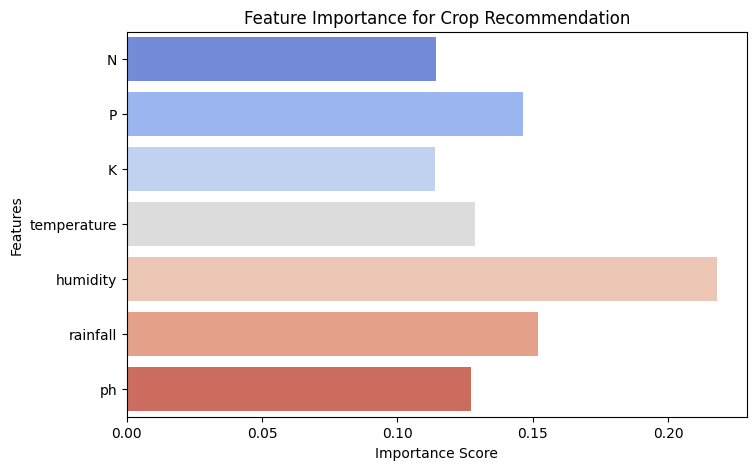

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importance = model_rf.feature_importances_
features = x_train.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=features, palette="coolwarm")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Crop Recommendation")
plt.show()


In [22]:
arr = [[140,28.4,200.4,14,55,400,7]]  # Adjust values as needed
y_pred = model_rf.predict(arr)
print("Predicted Crop:", y_pred[0])

Predicted Crop: barley


C:\Users\ROYAL INFOTECH\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [23]:
import joblib

# Train the model again
model_rf.fit(x_train, y_train)

# Save the updated model
joblib.dump(model_rf, 'crop_app.pkl')

print("Model saved successfully!")


Model saved successfully!
